J038 NLP Practical 2

In [18]:
!pip install gensim

import gensim.downloader as api
from gensim.models import KeyedVectors

In [1]:
import numpy as np
import pandas as pd

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

PART 1

In [36]:
model = api.load('word2vec-google-news-300')

In [37]:
words = ["apple", "river", "city", "computer", "music"]

In [38]:
for word in words:
    print(f"Similar words to '{word}':")
    similar_words = model.most_similar(word, topn=5)
    for similar_word, similarity in similar_words:
        print(f"  {similar_word}: {similarity:.4f}")
    print()

Similar words to 'apple':
  apples: 0.7204
  pear: 0.6451
  fruit: 0.6410
  berry: 0.6302
  pears: 0.6134

Similar words to 'river':
  creek: 0.7994
  lake: 0.7920
  rivers: 0.7778
  riverbank: 0.7284
  canal: 0.7222

Similar words to 'city':
  citys: 0.6804
  mayor: 0.6751
  town: 0.6724
  municipality: 0.6531
  municipal: 0.6223

Similar words to 'computer':
  computers: 0.7979
  laptop: 0.6640
  laptop_computer: 0.6549
  Computer: 0.6473
  com_puter: 0.6082

Similar words to 'music':
  classical_music: 0.7198
  jazz: 0.6835
  Music: 0.6596
  Without_Donny_Kirshner: 0.6416
  songs: 0.6396



this means that the model associates the word 'apple' closely with other fruits such as pear and berry; i.e it associates apple with a fruit.


similary, 'city' is associated with goverenance terms or synonyms of relaed entities like town and municipality

In [39]:
r1 = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("king - man + woman = ", r1)

king - man + woman =  [('queen', 0.7118193507194519)]


By subtracting "man" from "king" and adding "woman," the model correctly identifies "queen," showing that it understands the relationship between male and female counterparts in royal titles.

In [40]:
r2 = model.most_similar(positive=['paris', 'germany'], negative=['france'], topn=1)
print("paris - france + germany = ", r2)

paris - france + germany =  [('berlin', 0.48413652181625366)]


The model successfully identifies "Berlin" as the capital of Germany when substituting "Germany" for "France" in the context of "Paris." 

In [41]:
r3 = model.most_similar(positive=['swimming', 'run'], negative=['swim'], topn=1)
print("swimming - swim + run = ", r3)

swimming - swim + run =  [('running', 0.593652069568634)]


The model correctly identifies "running" when performing the operation of substituting "run" for "swim" in the context of "swimming." This indicates that the model understands the relationship between base forms of verbs and their progressive forms 

PART 2

In [2]:
df=pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [6]:
lemmatizer=WordNetLemmatizer()
stopwords=set(stopwords.words('english'))

In [24]:
def preprocess(text,word_remove=None):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    tokens=word_tokenize(text)
    tokens=[lemmatizer.lemmatize(word)for word in tokens if word not in stopwords and word != word_remove]
    return " ".join(tokens)

In [9]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shanaya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
def preprocess(text, word_remove=None):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word != word_remove]
    return tokens

In [11]:

df['cleaned_text'] = df['review'].apply(lambda text: preprocess(text, word_remove='br'))

df = df.drop('review', axis=1)


In [12]:
df.head()

,sentiment,cleaned_text
0,positive,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,positive,"[wonderful, little, production, filming, techn..."
2,positive,"[thought, wonderful, way, spend, time, hot, su..."
3,negative,"[basically, there, family, little, boy, jake, ..."
4,positive,"[petter, matteis, love, time, money, visually,..."


In [14]:
from sklearn.preprocessing import LabelEncoder
import string
from wordcloud import WordCloud

In [15]:
le=LabelEncoder()
df["sentiment"]=le.fit_transform(df["sentiment"])
     

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

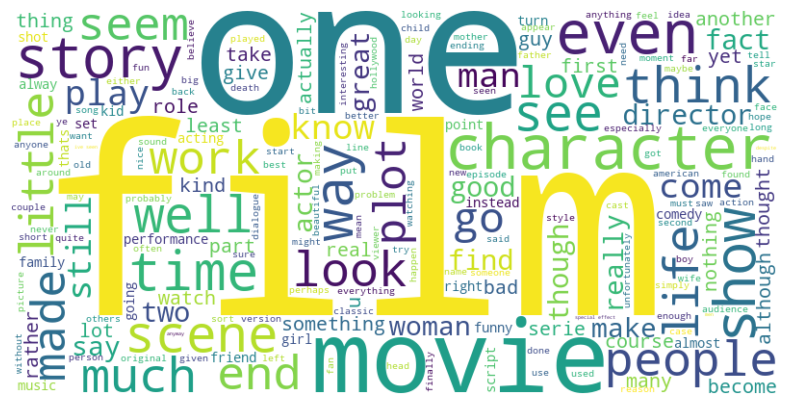

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of token lists and join them into a single string
all_tokens = [word for tokens in df['cleaned_text'] for word in tokens]
text = ' '.join(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


SKIPGRAM VECTOR

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [22]:
import gensim.downloader as api
from gensim.models import Word2Vec, KeyedVectors

In [23]:
skipgram = Word2Vec(
    sentences=df['cleaned_text'].tolist(),
    sg=1,
    vector_size=50,
    window=5,
    min_count=1,
)

In [26]:
skipgram.save("skipgram.model")

In [27]:
model = Word2Vec.load("skipgram.model")

In [28]:
word_vectors = model.wv
def get_skip(words):
    embedding = [word_vectors[word] for word in words if word in word_vectors]
    return np.mean(embedding, axis=0)

In [29]:
embedding=df['cleaned_text'].apply(get_skip)

In [30]:
data=pd.DataFrame(embedding.tolist())
final_df_skip=pd.concat([df,data],axis=1)
final_df_skip

,sentiment,cleaned_text,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,"[one, reviewer, mentioned, watching, 1, oz, ep...",0.186503,0.164281,-0.101728,-0.069763,-0.103208,-0.196435,0.640085,0.619756,...,0.489318,-0.154934,-0.151348,0.017353,0.625603,0.109497,-0.262796,-0.509295,0.228674,0.188860
1,1,"[wonderful, little, production, filming, techn...",0.160774,0.225680,-0.034313,-0.134902,-0.148146,-0.321801,0.436744,0.565264,...,0.595116,-0.149227,-0.147012,0.096242,0.658089,0.015440,-0.220836,-0.462270,0.159726,0.088053
2,1,"[thought, wonderful, way, spend, time, hot, su...",0.164057,0.182279,-0.160206,-0.121775,-0.068342,-0.220953,0.622350,0.617545,...,0.514412,-0.187384,-0.161125,0.097904,0.618083,0.099885,-0.132523,-0.577478,0.129498,0.243443
3,0,"[basically, there, family, little, boy, jake, ...",0.207758,0.131122,-0.125700,-0.208224,-0.114152,-0.299406,0.583316,0.645305,...,0.463119,-0.201875,-0.122534,0.102076,0.580057,0.173770,-0.217796,-0.517925,0.252937,0.124995
4,1,"[petter, matteis, love, time, money, visually,...",0.087815,0.179031,-0.050532,-0.052692,-0.005552,-0.281103,0.508272,0.614169,...,0.542713,-0.167551,-0.098835,0.098455,0.709552,0.161911,-0.174844,-0.472336,0.184008,0.146160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,"[thought, movie, right, good, job, wasnt, crea...",0.152420,0.242171,-0.132392,-0.151966,-0.026064,-0.221258,0.618150,0.732641,...,0.410540,-0.236770,-0.143924,0.127762,0.514171,0.186364,-0.079327,-0.602853,0.224103,0.240742
49996,0,"[bad, plot, bad, dialogue, bad, acting, idioti...",0.316401,0.195630,-0.073818,-0.145573,-0.097424,-0.309051,0.575987,0.632468,...,0.473017,-0.123766,-0.163070,0.192910,0.542761,0.044800,-0.073035,-0.490972,0.192293,0.138360
49997,0,"[catholic, taught, parochial, elementary, scho...",0.113628,0.153382,0.002110,-0.050988,-0.074864,-0.338075,0.610849,0.503178,...,0.572032,-0.183752,-0.148471,-0.163338,0.600147,0.176588,-0.162531,-0.557192,0.213263,0.211762
49998,0,"[im, going, disagree, previous, comment, side,...",0.099573,0.143421,-0.081020,-0.089578,-0.097115,-0.300928,0.576578,0.600965,...,0.522483,-0.180882,-0.036435,0.118691,0.627483,0.110295,-0.218742,-0.419548,0.185804,0.179075


In [31]:
X=final_df_skip.drop(['sentiment','cleaned_text'],axis=1)
Y=final_df_skip['sentiment']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [33]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [34]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8712


CBOW

In [44]:
cbow = Word2Vec(
    sentences=df['cleaned_text'].tolist(), 
    sg=0,
    vector_size=50,
    window=5,
    min_count=1,
)

In [45]:
cbow.save("cbow.model")

In [46]:
model = Word2Vec.load("cbow.model")

In [47]:
word_vectors = model.wv
def get_cbow(words):
    embedding = [word_vectors[word] for word in words if word in word_vectors]
    return np.mean(embedding, axis=0)

In [48]:
embedding=df['cleaned_text'].apply(get_cbow)
embedding.head()

0    [-0.1289442, -0.4040118, -0.48155844, 0.289289...
1    [-0.18987009, -0.33214316, -0.34525532, -0.009...
2    [-0.05252767, -0.42257255, -0.5715635, 0.17219...
3    [0.11286438, -0.86516774, -0.8643995, 0.369092...
4    [-0.6522163, -0.34189126, -0.65912855, 0.78826...
Name: cleaned_text, dtype: object

In [49]:
data=pd.DataFrame(embedding.tolist())
final_df_cbow=pd.concat([df,data],axis=1)
final_df_cbow

,sentiment,cleaned_text,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,"[one, reviewer, mentioned, watching, 1, oz, ep...",-0.128944,-0.404012,-0.481558,0.289289,0.092410,-0.266004,1.328345,0.288574,...,0.726180,0.320595,-0.569399,0.010518,0.805419,-0.315191,-0.055178,-0.542119,0.005227,0.845242
1,1,"[wonderful, little, production, filming, techn...",-0.189870,-0.332143,-0.345255,-0.009327,-0.570530,-0.465497,0.594243,0.376931,...,1.168214,0.529654,-0.895196,0.188428,1.110284,-0.755214,-0.053171,-0.392291,-0.444901,0.211716
2,1,"[thought, wonderful, way, spend, time, hot, su...",-0.052528,-0.422573,-0.571563,0.172199,-0.232737,0.019361,1.134153,0.085981,...,0.806582,0.516778,-0.690624,0.107979,0.711103,-0.251947,0.184806,-0.738577,-0.444567,0.801641
3,0,"[basically, there, family, little, boy, jake, ...",0.112864,-0.865168,-0.864399,0.369093,-0.141044,-0.544833,1.421696,0.185073,...,0.776118,0.738432,-0.804725,-0.112341,0.541883,-0.288349,0.111723,-0.326806,-0.339923,0.608000
4,1,"[petter, matteis, love, time, money, visually,...",-0.652216,-0.341891,-0.659129,0.788266,0.001320,-0.643678,0.978622,-0.097012,...,0.995518,0.390834,-0.530435,0.041955,0.984401,-0.405284,-0.097580,-0.554823,-0.246681,0.329077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,"[thought, movie, right, good, job, wasnt, crea...",0.204211,-0.873004,-0.731410,0.633102,-0.150495,0.532031,1.871093,0.268610,...,1.117556,0.486713,-0.989683,-0.077094,0.201527,0.013604,0.242992,-0.612399,-0.636903,0.972797
49996,0,"[bad, plot, bad, dialogue, bad, acting, idioti...",0.130953,-0.448300,-0.052338,-0.233834,-0.156618,-0.514092,1.370358,0.474071,...,0.702759,0.454738,-0.885702,0.068615,0.084485,-0.428365,0.077005,-0.601572,-0.528324,0.394245
49997,0,"[catholic, taught, parochial, elementary, scho...",-0.553992,-0.439352,-0.539412,0.343411,-0.023044,-0.706239,1.364440,0.043291,...,1.169587,0.271056,-0.640254,-0.631341,0.814551,-0.228578,0.054241,-0.432611,-0.327279,0.808681
49998,0,"[im, going, disagree, previous, comment, side,...",-0.294434,-0.394232,-0.313241,0.250408,-0.245425,-0.363513,0.809193,0.322564,...,0.710422,0.210902,-0.267193,0.123421,0.796816,-0.350640,-0.091665,-0.485540,-0.140633,0.478513


FINAL

In [50]:
X=final_df_cbow.drop(['sentiment','cleaned_text'],axis=1)
Y=final_df_cbow['sentiment']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [52]:
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8306
